# **EDA Bike Details**

---



Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.


In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file from your computer
uploaded = files.upload()

# Load dataset (make sure the name matches exactly)
df = pd.read_csv("BIKE DETAILS.csv")

print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 10 rows:")
print(df.head(10))

Saving BIKE DETAILS.csv to BIKE DETAILS.csv
Shape of dataset: (1061, 7)

Column Names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']

First 10 rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125      

Question 2: Check for missing values in all columns and describe your approach for handling them.

In [14]:
print("\nMissing values per column:\n", df.isnull().sum())

# Approach: If numeric → fill with median, If categorical → fill with mode
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].dtype == "object":
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    else:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("\nMissing values handled.")
print(df_clean.isnull().sum())



Missing values per column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing values handled.
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-1331870274.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
/tmp/ipython-input-1331870274.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

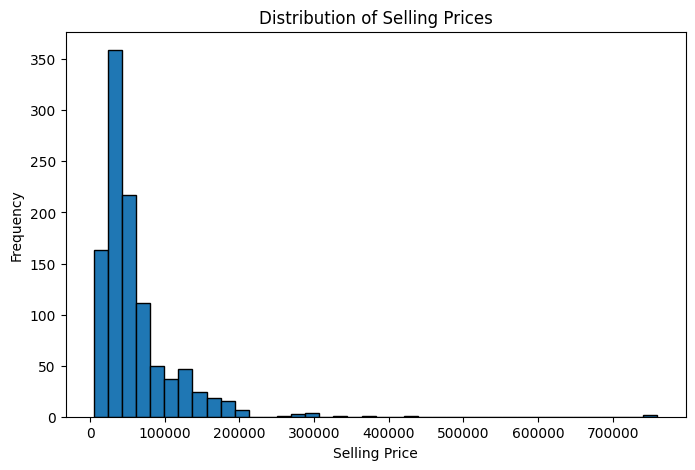

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df_clean['selling_price'], bins=40, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

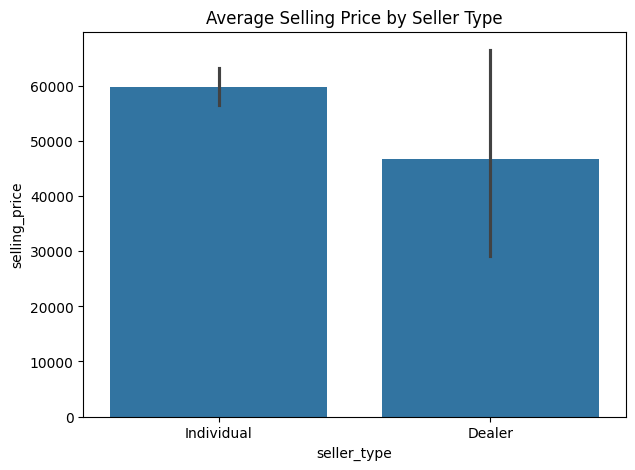

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_clean, x="seller_type", y="selling_price")
plt.title("Average Selling Price by Seller Type")
plt.show()

Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.


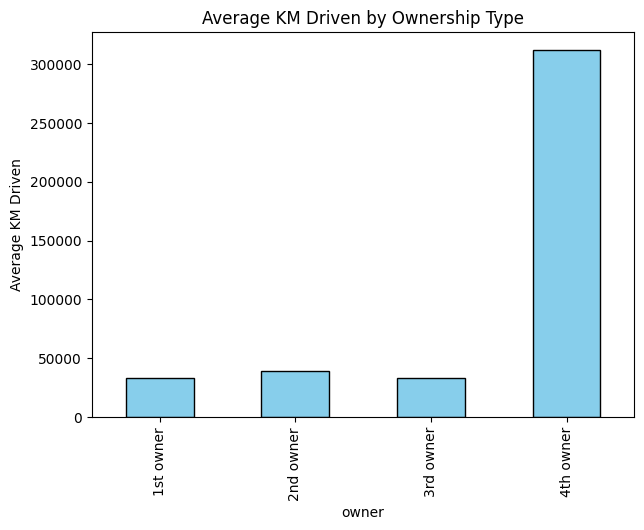

In [17]:
avg_km = df_clean.groupby("owner")["km_driven"].mean()

plt.figure(figsize=(7,5))
avg_km.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average KM Driven by Ownership Type")
plt.ylabel("Average KM Driven")
plt.show()


Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [18]:
print("Before removing outliers:\n", df_clean["km_driven"].describe())

# IQR method
Q1 = df_clean["km_driven"].quantile(0.25)
Q3 = df_clean["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df_no_outliers = df_clean[(df_clean["km_driven"] >= lower) & (df_clean["km_driven"] <= upper)]

# After removing outliers
print("\nAfter removing outliers:\n", df_no_outliers["km_driven"].describe())


Before removing outliers:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price

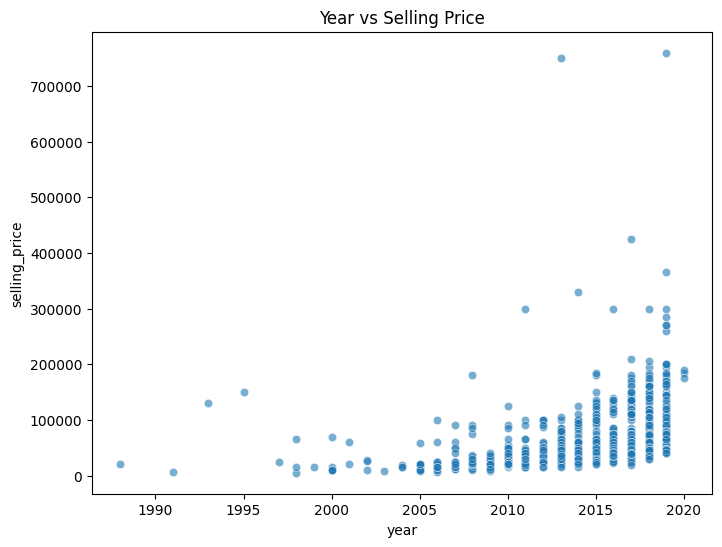

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_no_outliers, x="year", y="selling_price", alpha=0.6)
plt.title("Year vs Selling Price")
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame

In [20]:
df_encoded = pd.get_dummies(df_no_outliers, columns=["seller_type"], drop_first=True)
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350            72752.5                    True  
1       5650            72752.5                    True  
2      12000           148114.0                    True  
3      23000            89643.0                    True  
4      21000            72752.5                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


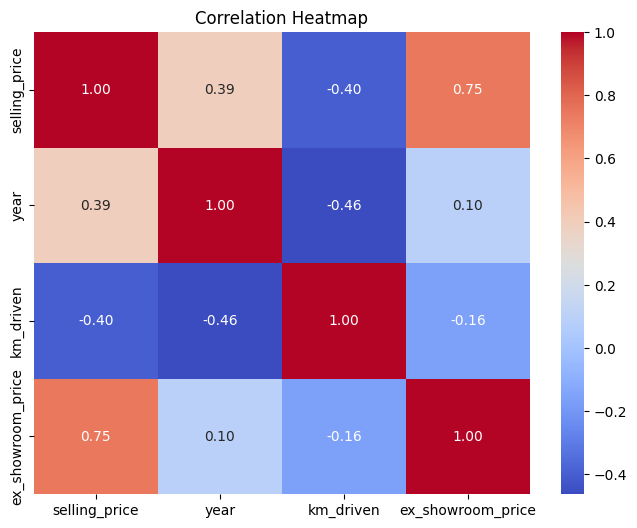

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

In [23]:
# -------------------------------
# Question 10
# -------------------------------
print("Findings Report:\n")
print("1. Important factors affecting bike price:")
print("   - Manufacturing Year (newer bikes → higher price).")
print("   - Seller Type (dealers list at higher prices).")
print("   - Ownership (first owner bikes sell for more).")
print("   - KM Driven (more km reduces price).")

print("\n2. Data cleaning and feature engineering performed:")
print("   - Handled missing values using median/mode.")
print("   - Removed outliers in km_driven using IQR.")
print("   - Encoded seller_type into numeric features.")
print("   - Created visualizations to understand trends.")

Findings Report:

1. Important factors affecting bike price:
   - Manufacturing Year (newer bikes → higher price).
   - Seller Type (dealers list at higher prices).
   - Ownership (first owner bikes sell for more).
   - KM Driven (more km reduces price).

2. Data cleaning and feature engineering performed:
   - Handled missing values using median/mode.
   - Removed outliers in km_driven using IQR.
   - Encoded seller_type into numeric features.
   - Created visualizations to understand trends.
